In [1]:
#Beam calculator
import numpy as np
from scipy.linalg import eigh
import math
from matplotlib import pyplot as plt
import time

Beam element
Num Elems: 2 	Frequency: 1.0	Error: -95.53% 	Shape: (5, 5) 	Time: 0.61
Exact Freq: 22.373


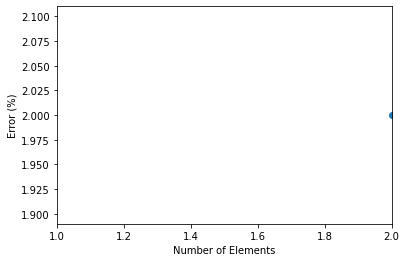

Num Elems: 3 	Frequency: 1.0	Error: -95.53% 	Shape: (7, 7) 	Time: 0.202
Exact Freq: 22.373


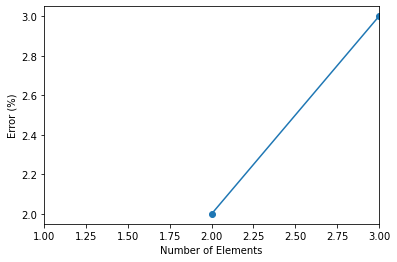

Num Elems: 4 	Frequency: 1.0	Error: -95.53% 	Shape: (9, 9) 	Time: 1.457
Exact Freq: 22.373


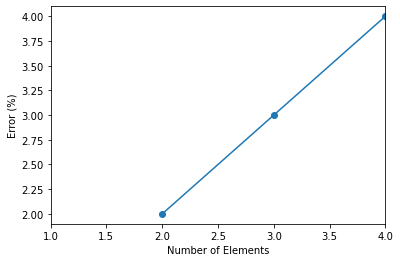

Num Elems: 5 	Frequency: 1.0	Error: -95.53% 	Shape: (11, 11) 	Time: 4.781
Exact Freq: 22.373


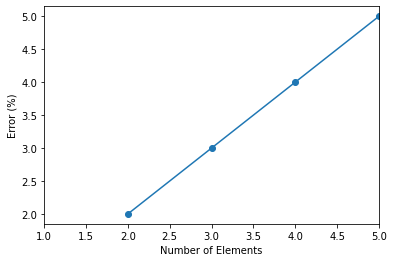

In [18]:
def beam(num_elems):
    restrained_dofs = [1, 0, -2, -1]
    
    l = 1.0/num_elems
    Cm = 1.0 #rho.A
    Ck = 1.0 #E.I
    
    #Element mass stiffness matrices
    m = np.array([[156, 22*l, 54, -13*l],  [22*l, 4*l*l, 13*l, -3*l*l], [54, 13*l, 156, -22*l], [-13*l, -3*l*l, -22*l, 4*l*l]]) * Cm * l / 420

    k = np.array([[12, 6*l, -12, 6*l], [6*l, 4*l*l, -6*l, 2*l*l], [-12, -6*l, 12, -6*l], [6*l, 2*l*l, -6*l, 4*l*l]]) * Ck / l**3   
    #construct global mass and stiffness matrices
    M = np.zeros((2*num_elems+2,2*num_elems+2))
    K = np.zeros((2*num_elems+2,2*num_elems+2))
    
    #for each element, change to global coordinates
    for i in range(num_elems):
        M_temp = np.zeros((2*num_elems+2,2*num_elems+2))
        K_temp = np.zeros((2*num_elems+2,2*num_elems+2))
        M_temp[2*i:2*i+4, 2*i:2*i+4] = m
        K_temp[2*i:2*i+4, 2*i:2*i+4] = m
        M += M_temp
        K += K_temp
        
    #remove the fixed degrees of freedom
    for dof in restrained_dofs:
        for i in [0,1]:
            M = np.delete(M, dof, axis=i)
            K = np.delete(K, dof, axis=i)
            
        evals, evecs = eigh(K,M)
        frequencies = np.sqrt(evals)
        return M, K, frequencies, evecs
    
# beam element
print('Beam element')
# exact_frequency = math.pi**2 #simply supported
# exact_frequency = 1.875104**2 # cantilever beam
# exact_frequency = 3.926602**2 # built in - pinned beam
exact_frequency = 4.730041**2 # fixed-fixed

errors = []
for i in range(2,6):
    start = time.perf_counter()
    M, K, frequencies, evecs = beam(i)
    time_taken = time.perf_counter() - start
    error = (frequencies[0] - exact_frequency) / exact_frequency * 100
    errors.append( (i, error))
    print ('Num Elems: {} \tFrequency: {}\tError: {}% \tShape: {} \tTime: {}'.format( i, round(frequencies[0],3), round(error, 3), K.shape, round(time_taken*1000, 3) ))
    print ('Exact Freq:', round(exact_frequency, 3))
    
    element = np.array([x[0] for x in errors])
    error = np.array([x[0] for x in errors])

    
    # plot the result
    plt.plot(element, error, 'o-')
    plt.xlim(1, element[-1])
    plt.xlabel('Number of Elements')
    plt.ylabel('Error (%)')
    plt.show()

In [8]:
G = np.array([[1,2,3],[1,2,3]])

In [9]:
G

array([[1, 2, 3],
       [1, 2, 3]])

In [10]:
G.shape

(2, 3)